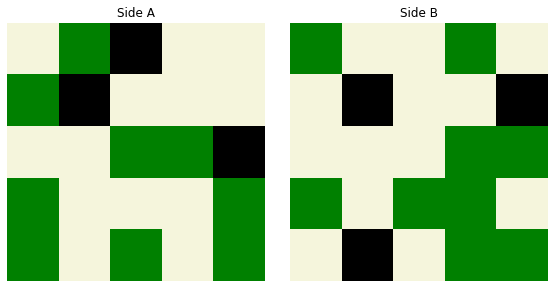

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def generate_key_card():
    # Randomize positions 0..24
    positions = list(range(25))
    random.shuffle(positions)
    
    # Partition positions:
    # Group 1: 3 positions (common green on both sides)
    group1 = positions[:3]
    remaining = positions[3:]
    # Group 2: 6 positions where side A is green (but side B will be black or beige)
    group2 = remaining[:6]
    remaining = remaining[6:]
    # Group 3: 3 positions where side A is black (side B gets a random permutation of [black, green, beige])
    group3 = remaining[:3]
    # Group 4: remaining 13 positions where side A is beige
    group4 = remaining[3:]
    assert len(group1) == 3 and len(group2) == 6 and len(group3) == 3 and len(group4) == 13

    # Initialize sides as dictionaries mapping cell index -> color string
    sideA = {}
    sideB = {}

    # Side A: Groups 1+2 are green, Group 3 is black, Group 4 is beige.
    for pos in group1 + group2:
        sideA[pos] = "green"
    for pos in group3:
        sideA[pos] = "black"
    for pos in group4:
        sideA[pos] = "beige"

    # Side B assignment:
    # Group 1: common green.
    for pos in group1:
        sideB[pos] = "green"
    # Group 2: randomly decide how many are black (between 0 and 2); rest become beige.
    x2 = random.randint(0, 2)
    group2_black = random.sample(group2, x2)
    for pos in group2:
        sideB[pos] = "black" if pos in group2_black else "beige"
    # Group 3: assign a random permutation of ["black", "green", "beige"]
    colors_group3 = ["black", "green", "beige"]
    random.shuffle(colors_group3)
    for pos, color in zip(group3, colors_group3):
        sideB[pos] = color
    # Group 4: determine what is needed to reach overall counts on side B:
    # Side B must have 9 greens.
    greens_so_far = 3 + colors_group3.count("green")  # Group1 (3) + Group3 green count; note: Group2 are non-green.
    needed_green = 9 - greens_so_far
    # Side B must have 3 blacks.
    blacks_so_far = x2 + colors_group3.count("black")
    needed_black = 3 - blacks_so_far
    # The remainder of Group 4 becomes beige.
    needed_beige = 13 - (needed_green + needed_black)
    group4_colors = (["green"] * needed_green) + (["black"] * needed_black) + (["beige"] * needed_beige)
    assert len(group4_colors) == 13
    random.shuffle(group4_colors)
    for pos, color in zip(group4, group4_colors):
        sideB[pos] = color

    # Build 5x5 grids (lists of lists) for each side.
    gridA, gridB = [], []
    for i in range(5):
        rowA, rowB = [], []
        for j in range(5):
            pos = i * 5 + j
            rowA.append(sideA[pos])
            rowB.append(sideB[pos])
        gridA.append(rowA)
        gridB.append(rowB)
    return gridA, gridB

def grid_to_numeric(grid, mapping):
    """Convert a grid of color strings to a numeric numpy array using a given mapping."""
    return np.array([[mapping[cell] for cell in row] for row in grid])

if __name__ == "__main__":
    # Generate the key card grids.
    gridA, gridB = generate_key_card()
    
    # Map colors to numeric values.
    # We assign: beige -> 0, green -> 1, black -> 2.
    mapping = {"beige": 0, "green": 1, "black": 2}
    numericA = grid_to_numeric(gridA, mapping)
    numericB = grid_to_numeric(gridB, mapping)
    
    # Create a custom colormap for our 3 colors.
    cmap = ListedColormap(["beige", "green", "black"])
    
    # Plot side A and side B as heatmaps.
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    
    axs[0].imshow(numericA, cmap=cmap)
    axs[0].set_title("Side A")
    axs[0].axis("off")
    
    axs[1].imshow(numericB, cmap=cmap)
    axs[1].set_title("Side B")
    axs[1].axis("off")
    
    plt.tight_layout()
    plt.show()
